In [12]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

In [13]:
#create new datasets containing just refugees and population density
#Load the dataset (one at a time)
data = loadtxt('populationDensity_stdscaler_both_features_zeros_removed.txt', delimiter='\t')

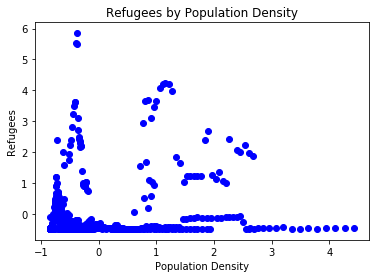

In [14]:
#Plot the data refugees by population density
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Refugees by Population Density')
xlabel('Population Density')
ylabel('Refugees')
show()

In [15]:
X = data[:, 0]
y = data[:, 1]

In [16]:
#number of training samples
m = y.size

In [17]:
#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

In [18]:
#Initialize theta parameters
theta = zeros(shape=(2, 1))

In [19]:
#Some gradient descent settings
iterations = 2000
alpha = 0.003

In [20]:
#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

0.49912739965070113
[[2.98647399e-13]
 [1.31812450e-01]]
For population density = -0.124242752, we predict a refugee count of -0.016377
For population density = -0.060863187, we predict a refugee count of -0.008023


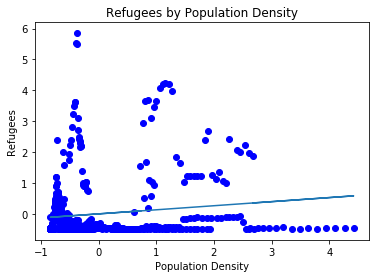

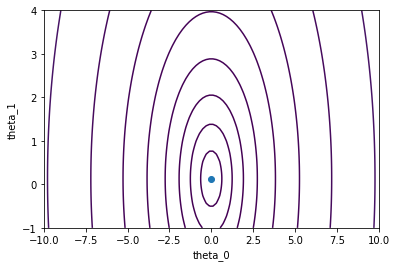

In [21]:
#Load the dataset
data = loadtxt('populationDensity_stdscaler_both_features_zeros_removed.txt', delimiter='\t')

#Plot the data refugees by population density
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Refugees by Population Density')
xlabel('Population Density')
ylabel('Refugees')
#show()

X = data[:, 0]
y = data[:, 1]


#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 2000
alpha = 0.003

#compute and display initial cost
print (compute_cost(it, y, theta))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print (theta)
#Predict refugee counts for population density values of -0.124242752 and -0.060863187
predict1 = array([1, -0.124242752]).dot(theta).flatten()
print ('For population density = -0.124242752, we predict a refugee count of %f' % (predict1))
predict2 = array([1, -0.060863187]).dot(theta).flatten()
print ('For population density = -0.060863187, we predict a refugee count of %f' % (predict2))

#Plot the results
result = it.dot(theta).flatten()
plot(data[:, 0], result)
show()


#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(it, y, thetaT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
scatter(theta[0][0], theta[1][0])
show()

Text(0.5, 1.0, 'Error vs. Training Epoch')

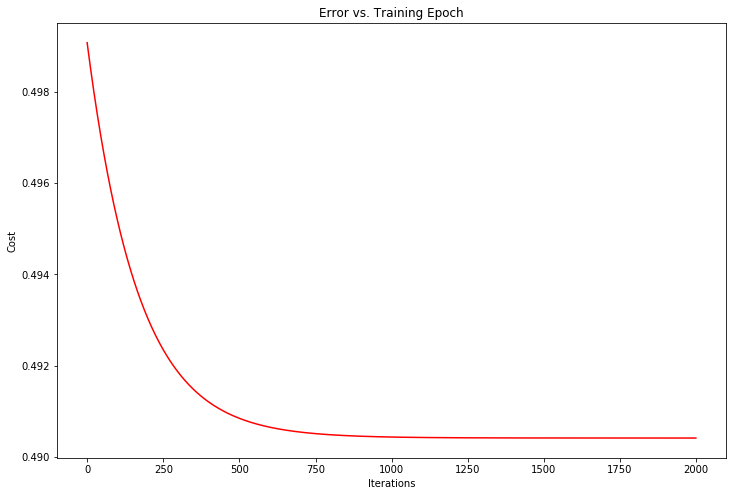

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), J_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')